## Linear Regression - New York Weather
Since I already did a lot of linear regression using GJ weather, I am going to do it for NEw York weather here. 

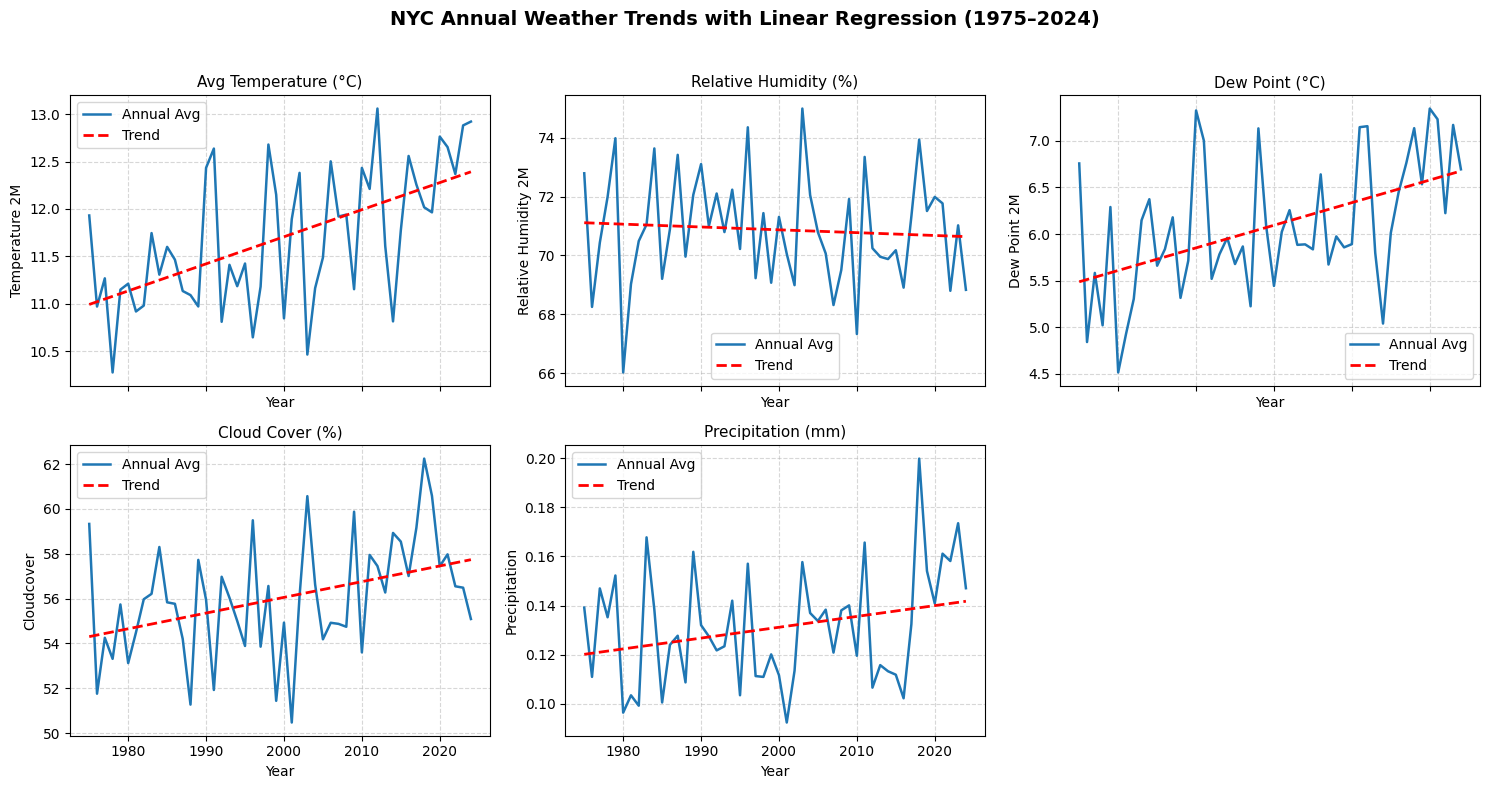


📊 Linear Regression Slopes (trend per year):
Temperature 2M           : 0.0285 per year
Relative Humidity 2M     : -0.0096 per year
Dew Point 2M             : 0.0243 per year
Cloudcover               : 0.0701 per year
Precipitation            : 0.0004 per year


In [8]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Get 50 years of NYC weather data ---
latitude = 40.7128
longitude = -74.0060
start_date = "1975-01-01"
end_date = "2024-12-31"

url = (
    "https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    "&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,cloudcover,precipitation"
    "&timezone=America%2FNew_York"
)

response = requests.get(url)
response.raise_for_status()
data = response.json()

df = pd.DataFrame(data["hourly"])
df["time"] = pd.to_datetime(df["time"])
df["date"] = df["time"].dt.date

# --- 2. Daily means → annual means ---
daily = df.groupby("date", as_index=False)[[
    "temperature_2m",
    "relative_humidity_2m",
    "dew_point_2m",
    "cloudcover",
    "precipitation"
]].mean()

daily["year"] = pd.to_datetime(daily["date"]).dt.year
numeric_cols = ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "cloudcover", "precipitation"]
annual = daily.groupby("year")[numeric_cols].mean()

# --- 3. Plot grid with regression lines ---
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
axes = axes.flatten()
titles = {
    "temperature_2m": "Avg Temperature (°C)",
    "relative_humidity_2m": "Relative Humidity (%)",
    "dew_point_2m": "Dew Point (°C)",
    "cloudcover": "Cloud Cover (%)",
    "precipitation": "Precipitation (mm)",
}

years = annual.index.values.astype(float)

for i, var in enumerate(numeric_cols):
    ax = axes[i]
    y = annual[var].values

    # Plot data
    ax.plot(years, y, color="tab:blue", linewidth=1.8, label="Annual Avg")

    # --- Linear regression ---
    slope, intercept = np.polyfit(years, y, 1)
    trend = slope * years + intercept
    ax.plot(years, trend, color="red", linestyle="--", linewidth=2, label="Trend")

    # --- Labels & titles ---
    ax.set_title(titles[var], fontsize=11)
    ax.set_xlabel("Year")
    ax.set_ylabel(var.replace("_", " ").title())
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend()

# Hide the unused subplot
fig.delaxes(axes[-1])

fig.suptitle("NYC Annual Weather Trends with Linear Regression (1975–2024)", fontsize=14, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 4. Show slopes for interpretation ---
print("\n📊 Linear Regression Slopes (trend per year):")
for var in numeric_cols:
    slope, _ = np.polyfit(years, annual[var].values, 1)
    print(f"{var.replace('_', ' ').title():25s}: {slope:.4f} per year")


## Analysis:
While a lot of the graphs windows are skewed to make it look like a bigger difference than it actually is, we can see a general upward trend in a lot of the variables when we look at the regression line (minus humidity). 